In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn 
import numpy as np 

In [2]:
df1 = pd.read_csv("DDW_B18_0800_NIC_FINAL_STATE_RAJASTHAN-2011.csv", encoding='ISO-8859-1')
df2 = pd.read_csv("DDW_B18_1200_NIC_FINAL_STATE_ARUNACHAL_PRADESH-2011.csv", encoding='ISO-8859-1')
df3 = pd.read_csv("DDW_B18_1400_NIC_FINAL_STATE_MANIPUR-2011.csv", encoding='ISO-8859-1')
df4 = pd.read_csv("DDW_B18_1500_NIC_FINAL_STATE_MIZORAM-2011.csv", encoding='ISO-8859-1')
df5 = pd.read_csv("DDW_B18_1900_NIC_FINAL_STATE_WEST_BENGAL-2011.csv", encoding='ISO-8859-1')
df6 = pd.read_csv("DDW_B18sc_0700_NIC_FINAL_STATE_NCT_OF_DELHI-2011.csv", encoding='ISO-8859-1')
df7 = pd.read_csv("DDW_B18sc_1600_NIC_FINAL_STATE_TRIPURA-2011.csv", encoding='ISO-8859-1')
df8 = pd.read_csv("DDW_B18sc_2000_NIC_FINAL_STATE_JHARKHAND-2011.csv", encoding='ISO-8859-1')
df9 = pd.read_csv("DDW_B18sc_2400_NIC_FINAL_STATE_GUJARAT-2011.csv", encoding='ISO-8859-1')
df10 = pd.read_csv("DDW_B18sc_2700_NIC_FINAL_STATE_MAHARASHTRA-2011.csv", encoding='ISO-8859-1')
df11 = pd.read_csv("DDW_B18sc_2900_NIC_FINAL_STATE_KARNATAKA-2011.csv", encoding='ISO-8859-1')
df12 = pd.read_csv("DDW_B18sc_3000_NIC_FINAL_STATE_GOA-2011.csv", encoding='ISO-8859-1')
df13 = pd.read_csv("DDW_B18sc_3200_NIC_FINAL_STATE_KERALA-2011.csv", encoding='ISO-8859-1')
df14 = pd.read_csv("DDW_B18sc_3300_NIC_FINAL_STATE_TAMIL_NADU-2011.csv", encoding='ISO-8859-1')
df15 = pd.read_csv("DDW_B18sc_3400_NIC_FINAL_STATE_PUDUCHERRY-2011.csv", encoding='ISO-8859-1')
df16 = pd.read_csv("DDW_B18st_0200_NIC_FINAL_STATE_HIMACHAL_PRADESH-2011.csv", encoding='ISO-8859-1')
df17 = pd.read_csv("DDW_B18st_0500_NIC_FINAL_STATE_UTTARAKHAND-2011.csv", encoding='ISO-8859-1')
df18 = pd.read_csv("DDW_B18st_0900_NIC_FINAL_STATE_UTTAR_PRADESH-2011.csv", encoding='ISO-8859-1')
df19 = pd.read_csv("DDW_B18st_1000_NIC_FINAL_STATE_BIHAR-2011.csv", encoding='ISO-8859-1')
df20 = pd.read_csv("DDW_B18st_1100_NIC_FINAL_STATE_SIKKIM-2011.csv", encoding='ISO-8859-1')
df21 = pd.read_csv("DDW_B18st_1300_NIC_FINAL_STATE_NAGALAND-2011.csv", encoding='ISO-8859-1')
df22 = pd.read_csv("DDW_B18st_1800_NIC_FINAL_STATE_ASSAM-2011.csv", encoding='ISO-8859-1')
df23 = pd.read_csv("DDW_B18st_2100_NIC_FINAL_STATE_ODISHA-2011.csv", encoding='ISO-8859-1')

In [3]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23])
#df

In [4]:
#df.to_csv("Combined IHR.csv", index=False)

In [4]:
df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females'],
      dtype='object')

In [6]:
df[['State', 'District']] = df['India/States'].str.extract(r'STATE - ([\w\s]+)|District - ([\w\s]+)', expand=True)

In [7]:
df[['State', 'District']].isnull().sum()

State       180430
District     14715
dtype: int64

In [8]:
# Fill NaN values in 'State' column with forward fill (ffill)
df['State'] = df['State'].ffill()
df['District'] = df['District'].bfill()

In [9]:
df[['State', 'District']].isnull().sum()

State       0
District    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195145 entries, 0 to 12046
Data columns (total 27 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           195145 non-null  object
 1   District Code                        195145 non-null  object
 2   India/States                         195145 non-null  object
 3   Division                             195145 non-null  object
 4   Group                                195145 non-null  object
 5   Class                                195145 non-null  object
 6   NIC Name                             195145 non-null  object
 7   Main Workers - Total -  Persons      195145 non-null  int64 
 8   Main Workers - Total - Males         195145 non-null  int64 
 9   Main Workers - Total - Females       195145 non-null  int64 
 10  Main Workers - Rural -  Persons      195145 non-null  int64 
 11  Main Workers - Rural - Males    

In [11]:
df.columns = [col_name.replace('-', ' ') for col_name in df.columns]

In [12]:
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)

In [13]:
df['Total_Workers'] = df['Main Workers Total Persons'] + df['Marginal Workers Total Persons']

In [14]:
df['Total_Male_works'] = df['Main Workers Total Males'] + df['Marginal Workers Total Males']

In [15]:
df['Total_Women_works'] = df['Main Workers Total Females'] + df['Marginal Workers Total Females']

In [16]:
df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers Total Persons',
       'Main Workers Total Males', 'Main Workers Total Females',
       'Main Workers Rural Persons', 'Main Workers Rural Males',
       'Main Workers Rural Females', 'Main Workers Urban Persons',
       'Main Workers Urban Males', 'Main Workers Urban Females',
       'Marginal Workers Total Persons', 'Marginal Workers Total Males',
       'Marginal Workers Total Females', 'Marginal Workers Rural Persons',
       'Marginal Workers Rural Males', 'Marginal Workers Rural Females',
       'Marginal Workers Urban Persons', 'Marginal Workers Urban Males',
       'Marginal Workers Urban Females', 'State', 'District', 'Total_Workers',
       'Total_Male_works', 'Total_Women_works'],
      dtype='object')

In [17]:
df.isna().sum()

State Code                        0
District Code                     0
India/States                      0
Division                          0
Group                             0
Class                             0
NIC Name                          0
Main Workers Total Persons        0
Main Workers Total Males          0
Main Workers Total Females        0
Main Workers Rural Persons        0
Main Workers Rural Males          0
Main Workers Rural Females        0
Main Workers Urban Persons        0
Main Workers Urban Males          0
Main Workers Urban Females        0
Marginal Workers Total Persons    0
Marginal Workers Total Males      0
Marginal Workers Total Females    0
Marginal Workers Rural Persons    0
Marginal Workers Rural Males      0
Marginal Workers Rural Females    0
Marginal Workers Urban Persons    0
Marginal Workers Urban Males      0
Marginal Workers Urban Females    0
State                             0
District                          0
Total_Workers               

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.head()

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers Total Persons,Main Workers Total Males,Main Workers Total Females,...,Marginal Workers Rural Males,Marginal Workers Rural Females,Marginal Workers Urban Persons,Marginal Workers Urban Males,Marginal Workers Urban Females,State,District,Total_Workers,Total_Male_works,Total_Women_works
0,`08,`000,STATE - RAJASTHAN,`00,`000,`0000,Total,9017944,7594737,1423207,...,749381,1076449,481922,297432,184490,RAJASTHAN,Ganganagar,11325696,8641550,2684146
1,`08,`000,STATE - RAJASTHAN,`01,`000,`0000,"Crop and animal production, hunting and relate...",450766,201572,249194,...,71124,319740,17864,4982,12882,RAJASTHAN,Ganganagar,859494,277678,581816
2,`08,`000,STATE - RAJASTHAN,`01,`011,`0000,Growing of non-perennial crops,12876,10547,2329,...,3295,4852,1415,756,659,RAJASTHAN,Ganganagar,22438,14598,7840
3,`08,`000,STATE - RAJASTHAN,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",12061,9911,2150,...,3161,4616,1308,722,586,RAJASTHAN,Ganganagar,21146,13794,7352
4,`08,`000,STATE - RAJASTHAN,`01,`011,`0112,Growing of rice,79,71,8,...,2,9,2,2,0,RAJASTHAN,Ganganagar,92,75,17


In [20]:
df['State Code'] = df['State Code'].astype(str).str.replace('`', '')
df['District Code'] = df['District Code'].astype(str).str.replace('`', '')
df['Division'] = df['Division'].astype(str).str.replace('`', '')
df['Group'] = df['Group'].astype(str).str.replace('`', '')
df['Class'] = df['Class'].astype(str).str.replace('`', '')

In [ ]:
df['State Code'] = df['State Code'].astype(np.int32)
df['District Code'] = df['District Code'].astype(np.int32)
df['Division'] = df['Division'].astype(np.int32)
df['Group'] = df['Group'].astype(np.int32)
df['Class'] = df['Class'].astype(np.int32)
df['NIC Name'] = df['NIC Name'].astype(str)

In [21]:
#df.head()

In [22]:
df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers Total Persons',
       'Main Workers Total Males', 'Main Workers Total Females',
       'Main Workers Rural Persons', 'Main Workers Rural Males',
       'Main Workers Rural Females', 'Main Workers Urban Persons',
       'Main Workers Urban Males', 'Main Workers Urban Females',
       'Marginal Workers Total Persons', 'Marginal Workers Total Males',
       'Marginal Workers Total Females', 'Marginal Workers Rural Persons',
       'Marginal Workers Rural Males', 'Marginal Workers Rural Females',
       'Marginal Workers Urban Persons', 'Marginal Workers Urban Males',
       'Marginal Workers Urban Females', 'State', 'District', 'Total_Workers',
       'Total_Male_works', 'Total_Women_works'],
      dtype='object')

In [23]:
df.to_csv("Combined IHR.csv", index=False)

# Outliers

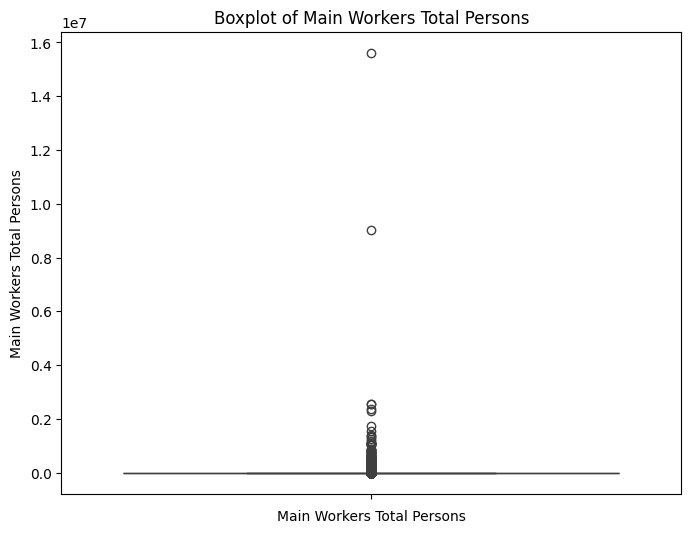

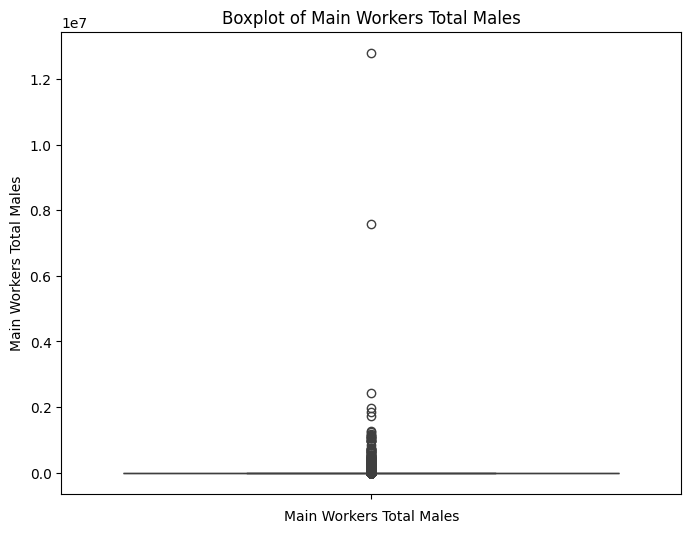

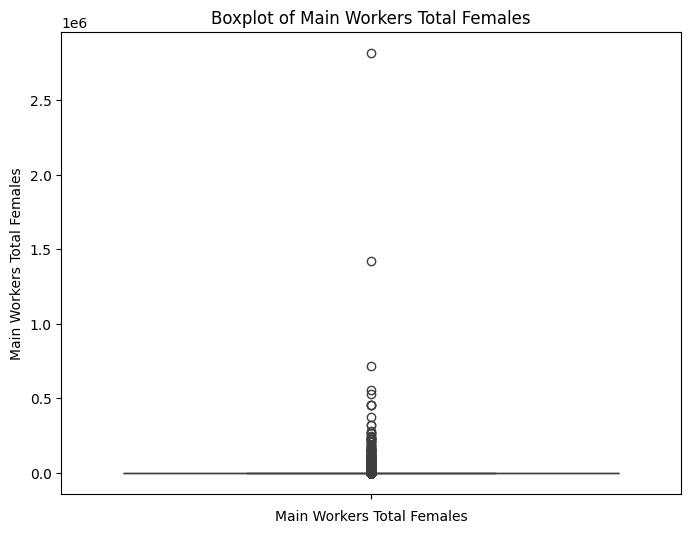

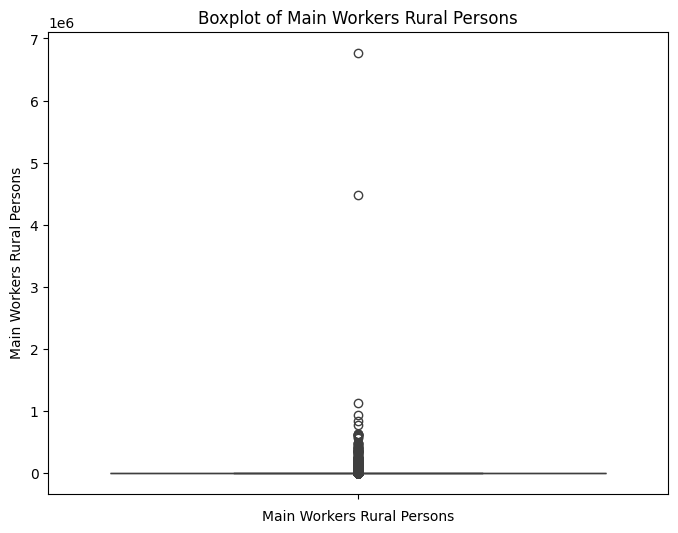

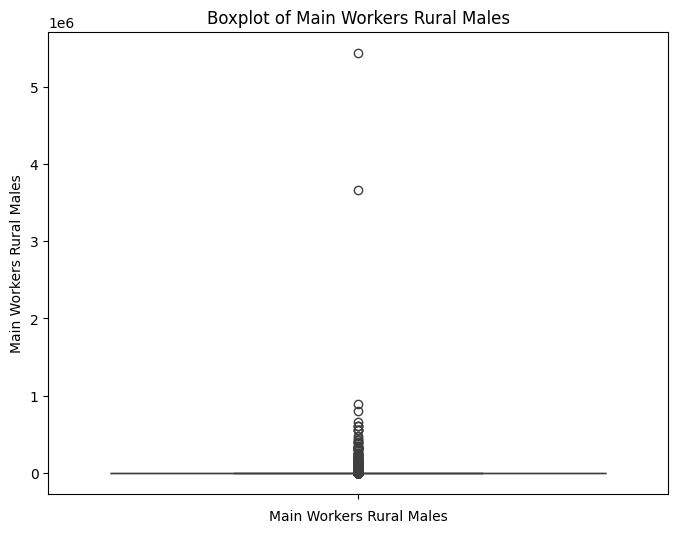

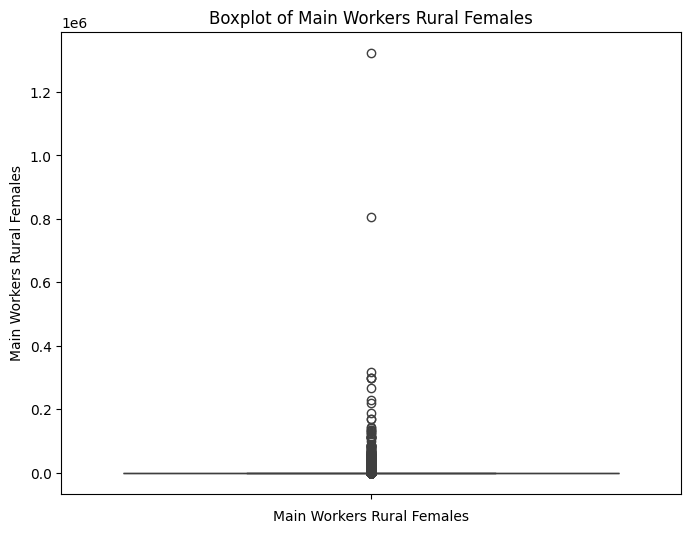

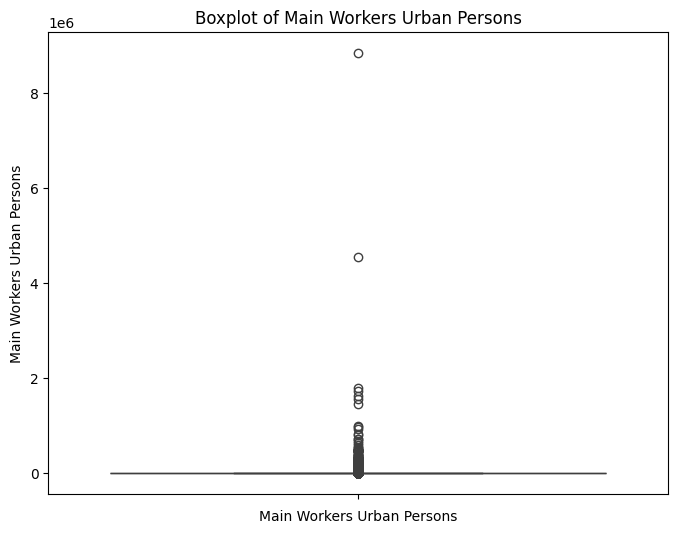

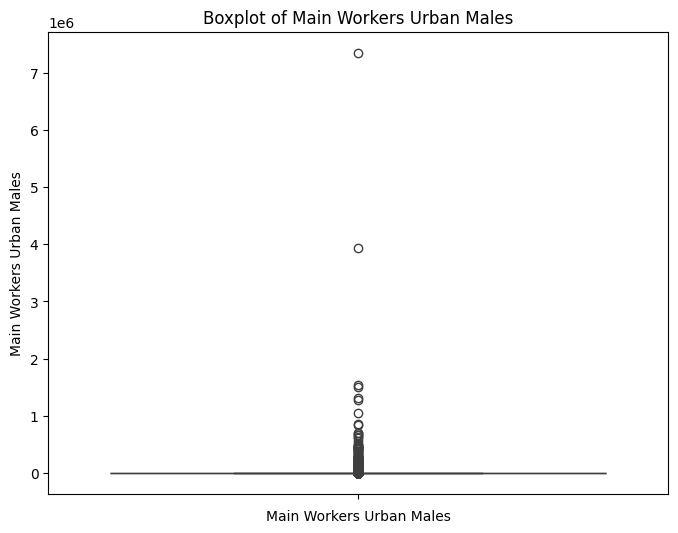

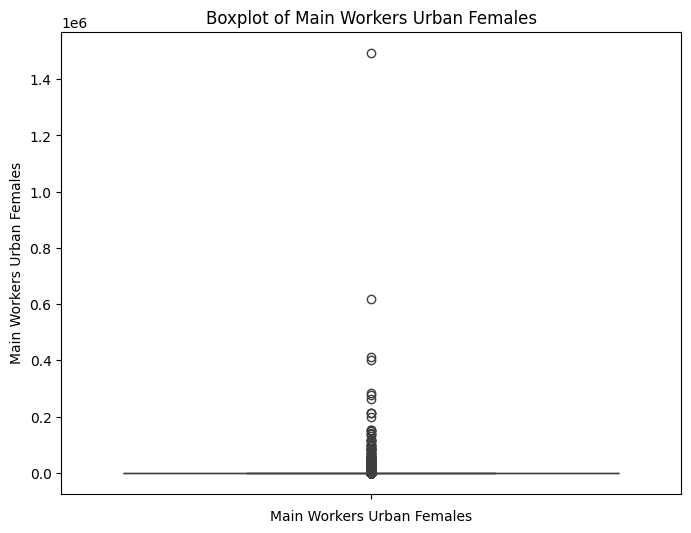

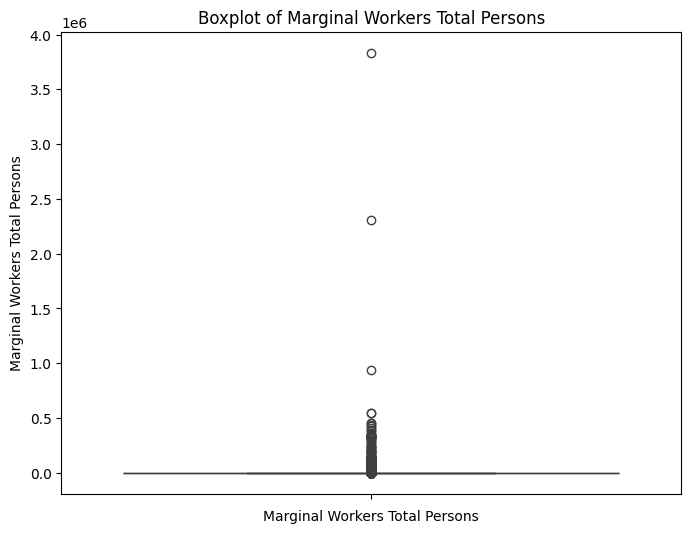

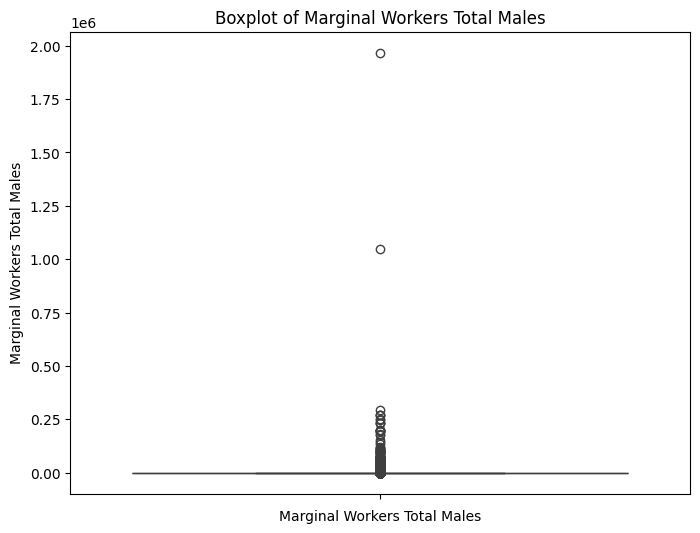

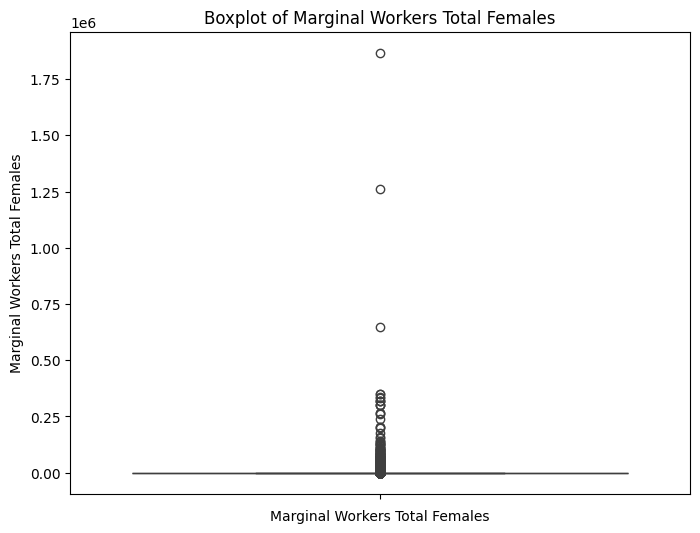

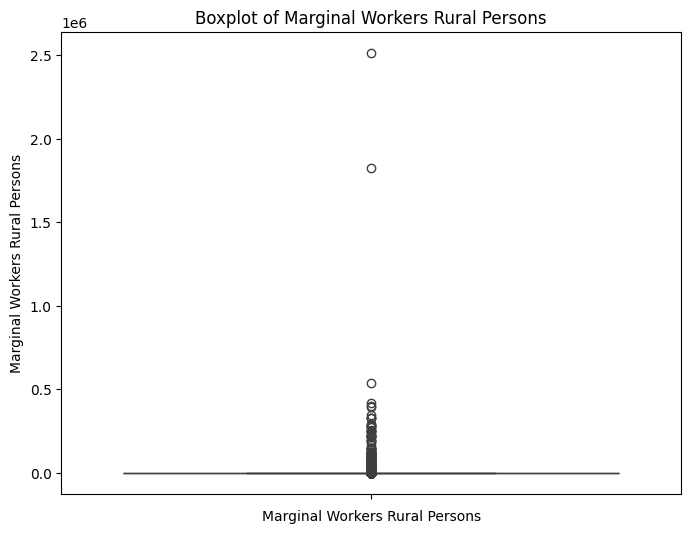

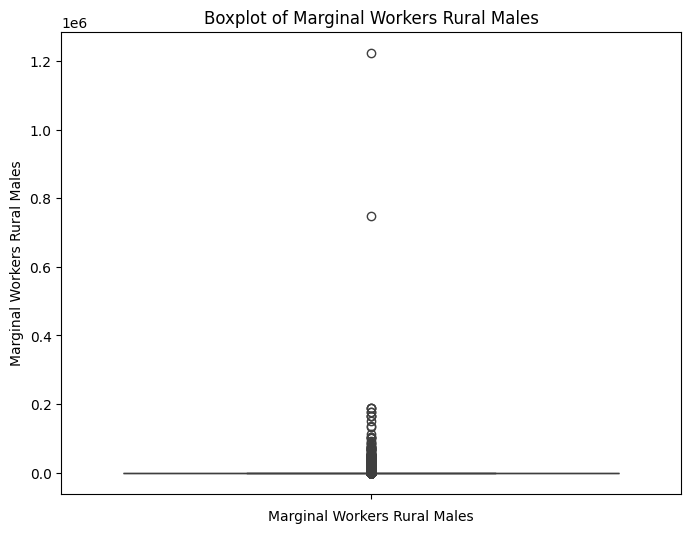

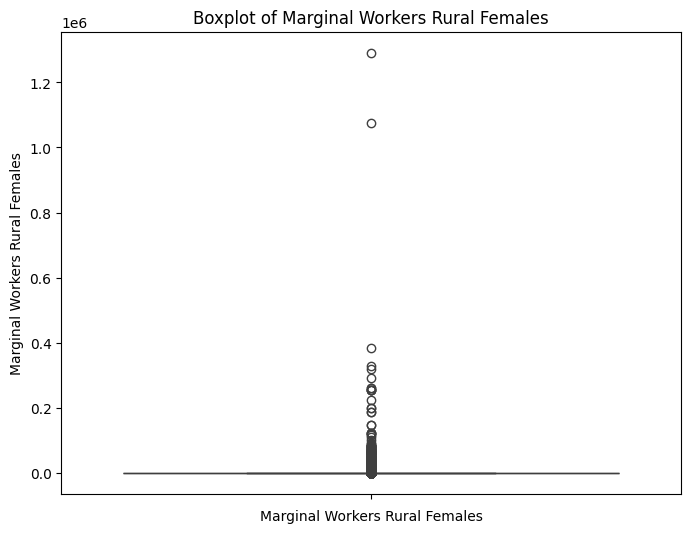

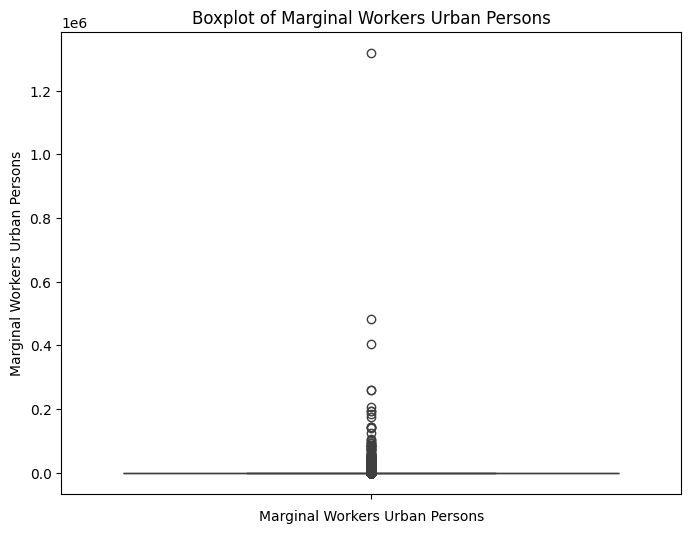

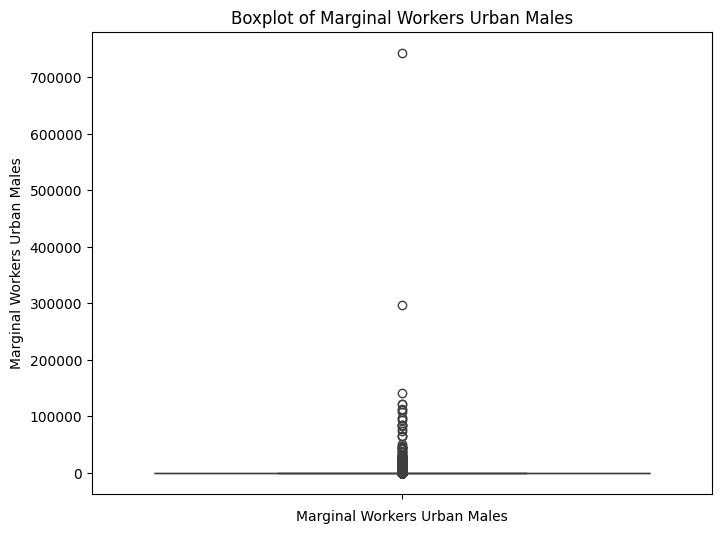

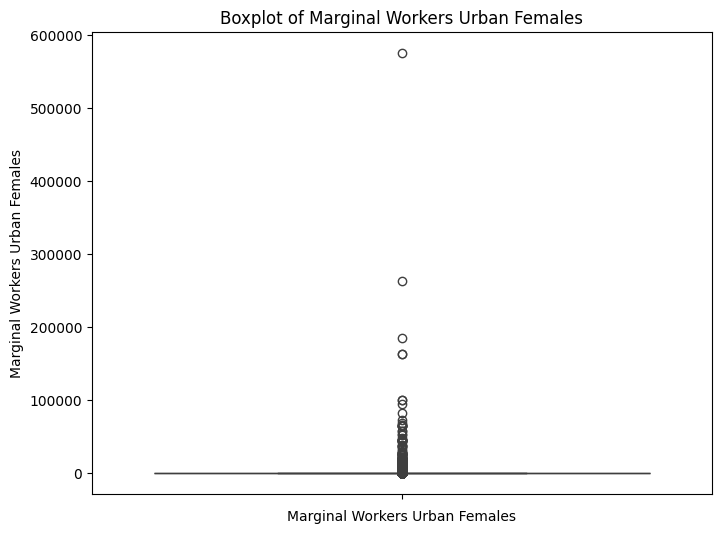

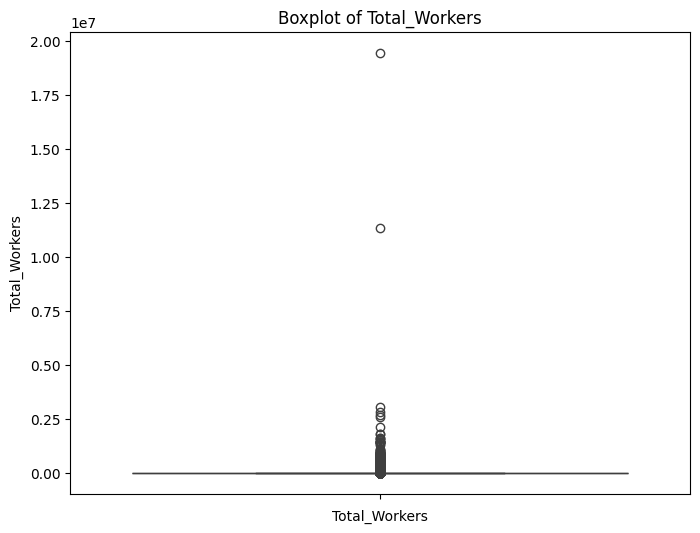

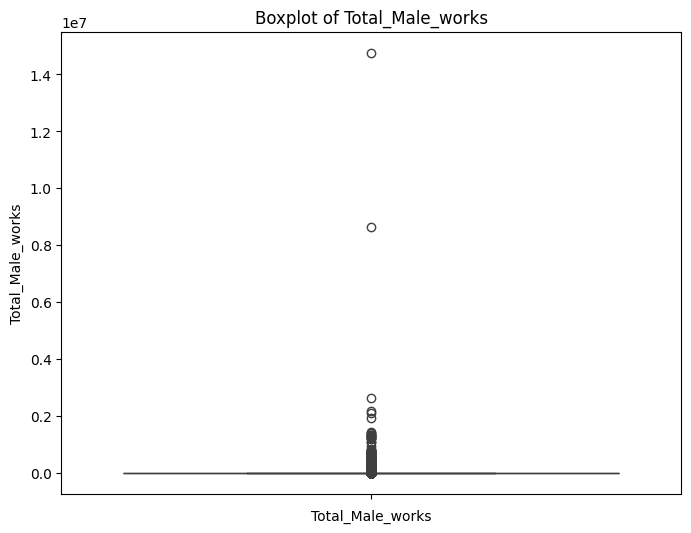

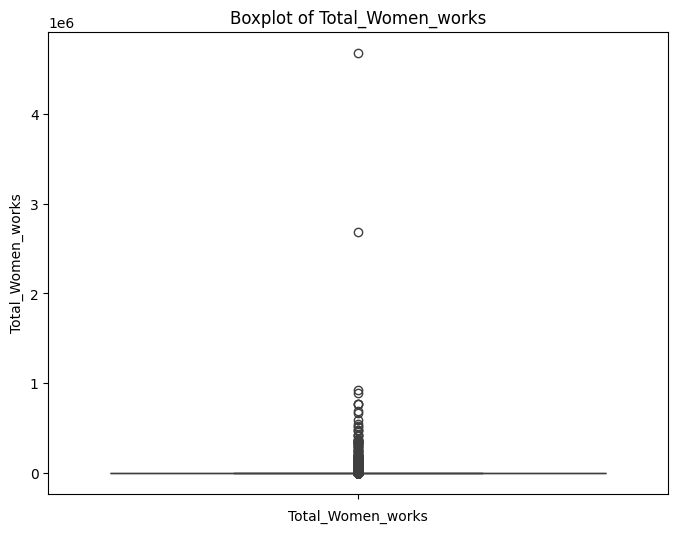

In [24]:
columns = ['Main Workers Total Persons',
       'Main Workers Total Males', 'Main Workers Total Females',
       'Main Workers Rural Persons', 'Main Workers Rural Males',
       'Main Workers Rural Females', 'Main Workers Urban Persons',
       'Main Workers Urban Males', 'Main Workers Urban Females',
       'Marginal Workers Total Persons', 'Marginal Workers Total Males',
       'Marginal Workers Total Females', 'Marginal Workers Rural Persons',
       'Marginal Workers Rural Males', 'Marginal Workers Rural Females',
       'Marginal Workers Urban Persons', 'Marginal Workers Urban Males',
       'Marginal Workers Urban Females', 'Total_Workers',
       'Total_Male_works', 'Total_Women_works']

for col in columns:
    plt.figure(figsize=(8, 6))  
    sn.boxplot(data=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show() 

In [25]:
columns = ['Main Workers Total Persons', 'Main Workers Total Males', 'Main Workers Total Females', 'Main Workers Rural Persons', 'Main Workers Rural Males',
       'Main Workers Rural Females', 'Main Workers Urban Persons', 'Main Workers Urban Males', 'Main Workers Urban Females','Marginal Workers Total Persons',
       'Marginal Workers Total Males', 'Marginal Workers Total Females', 'Marginal Workers Rural Persons', 'Marginal Workers Rural Males', 
       'Marginal Workers Rural Females', 'Marginal Workers Urban Persons', 'Marginal Workers Urban Males', 'Marginal Workers Urban Females',
       'Total_Workers', 'Total_Male_works', 'Total_Women_works']
for col in columns:
    data = df[col]
    Q1 = np.nanpercentile(data, 25)
    Q3 = np.nanpercentile(data, 75)
    IQR = Q3 - Q1

    # Step 4: Calculate lower and upper bounds for capping
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Step 5: Cap values outside the lower and upper bounds
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])

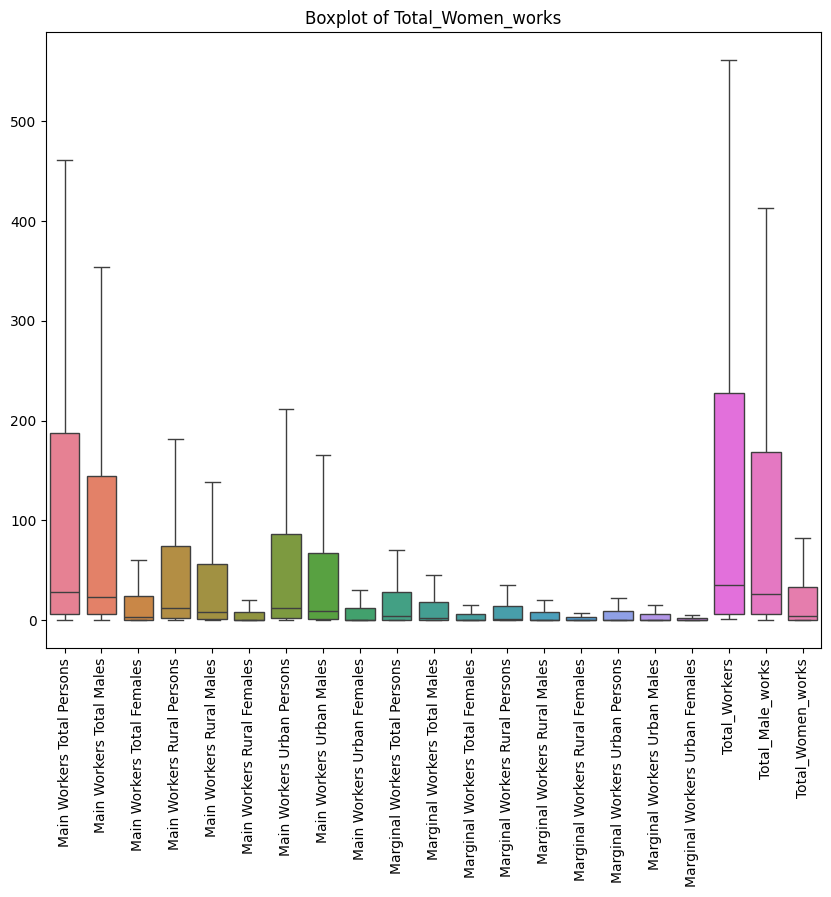

In [26]:
columns = ['Main Workers Total Persons', 'Main Workers Total Males', 'Main Workers Total Females', 'Main Workers Rural Persons', 'Main Workers Rural Males',
       'Main Workers Rural Females', 'Main Workers Urban Persons', 'Main Workers Urban Males', 'Main Workers Urban Females','Marginal Workers Total Persons',
       'Marginal Workers Total Males', 'Marginal Workers Total Females', 'Marginal Workers Rural Persons', 'Marginal Workers Rural Males', 
       'Marginal Workers Rural Females', 'Marginal Workers Urban Persons', 'Marginal Workers Urban Males', 'Marginal Workers Urban Females',
       'Total_Workers', 'Total_Male_works', 'Total_Women_works']
plt.figure(figsize=(10, 8))  
sn.boxplot(data=df[columns])
plt.xticks(rotation=90)
plt.title(f'Boxplot of {col}')
plt.show()    

<Axes: >

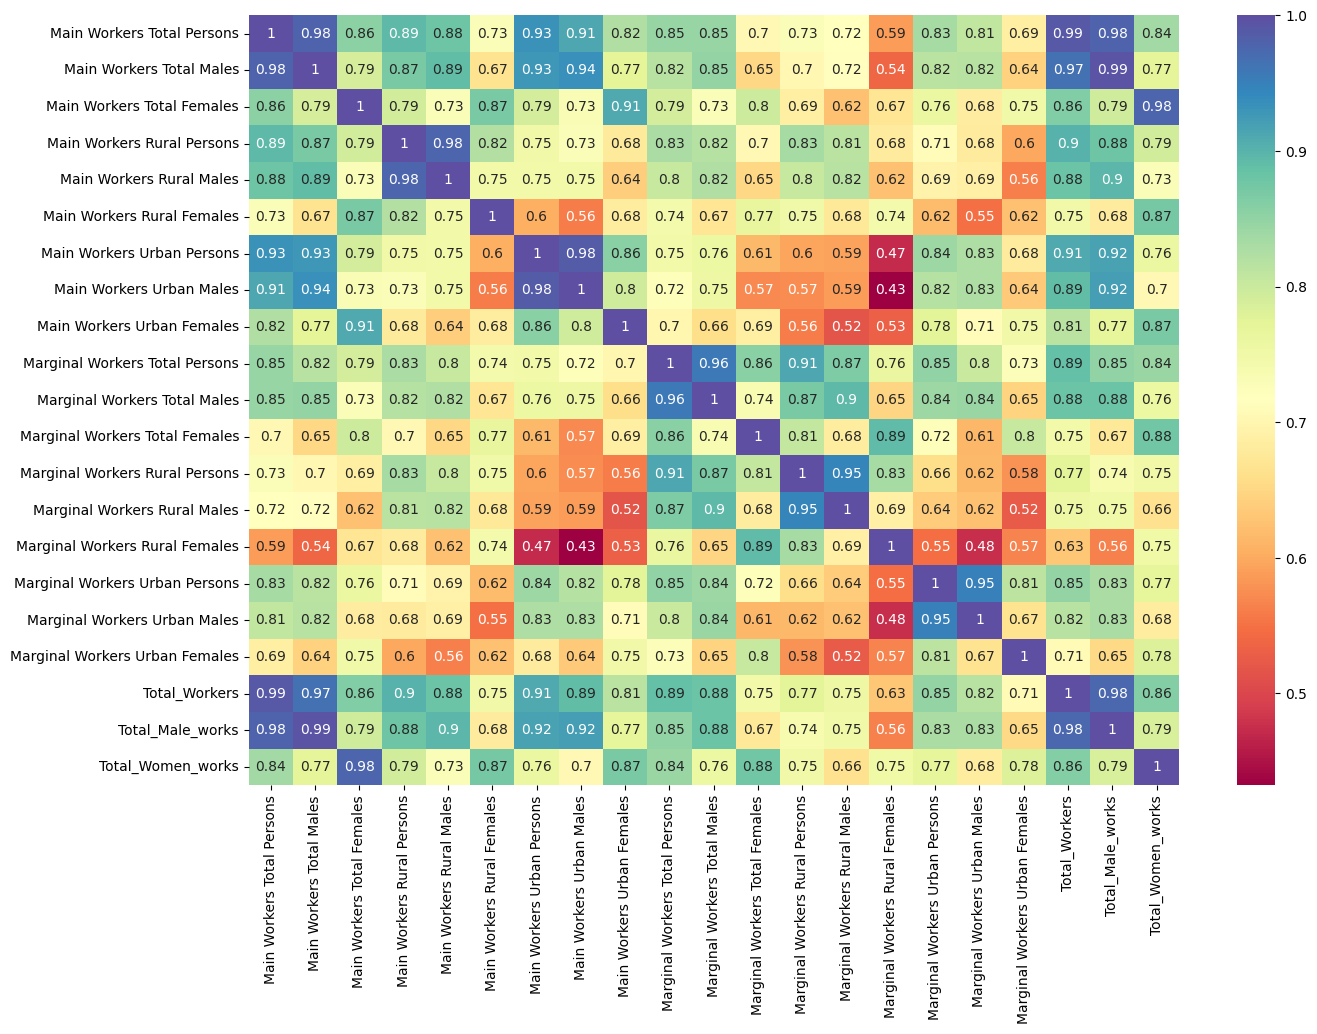

In [27]:
x=df[['Main Workers Total Persons', 'Main Workers Total Males', 'Main Workers Total Females', 'Main Workers Rural Persons', 'Main Workers Rural Males',
       'Main Workers Rural Females', 'Main Workers Urban Persons', 'Main Workers Urban Males', 'Main Workers Urban Females','Marginal Workers Total Persons',
       'Marginal Workers Total Males', 'Marginal Workers Total Females', 'Marginal Workers Rural Persons', 'Marginal Workers Rural Males', 
       'Marginal Workers Rural Females', 'Marginal Workers Urban Persons', 'Marginal Workers Urban Males', 'Marginal Workers Urban Females',
       'Total_Workers', 'Total_Male_works', 'Total_Women_works']].corr()
plt.figure(figsize=(15,10))
sn.heatmap(x, annot=True, cmap="Spectral")

In [28]:
df.to_csv("Combined IHR 01.csv", index=False)

# EDA 

In [29]:
df_1 = df.copy()

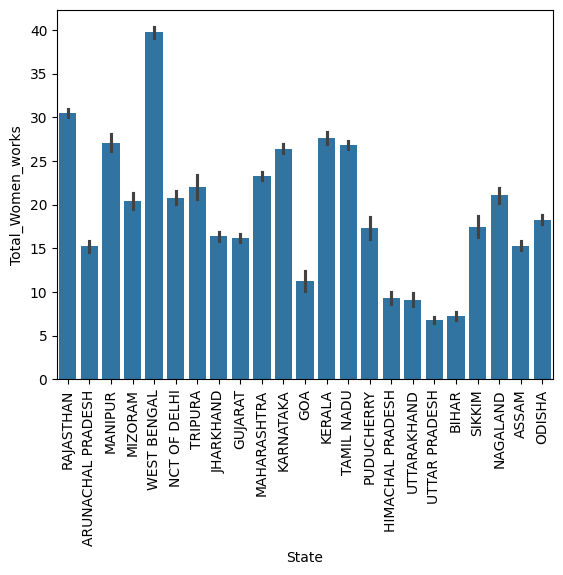

In [30]:
sn. barplot(data = df_1, x = "State", y = "Total_Women_works")
plt.xticks(rotation=90)
plt.show()

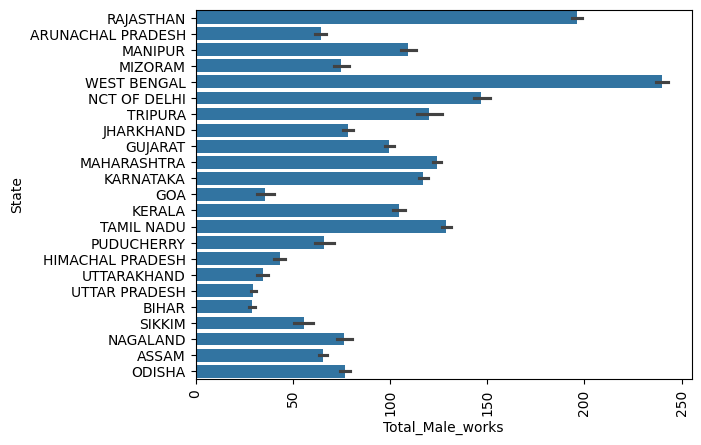

In [31]:
sn. barplot(data = df_1, x = "Total_Male_works", y = "State")
plt.xticks(rotation=90)
plt.show()

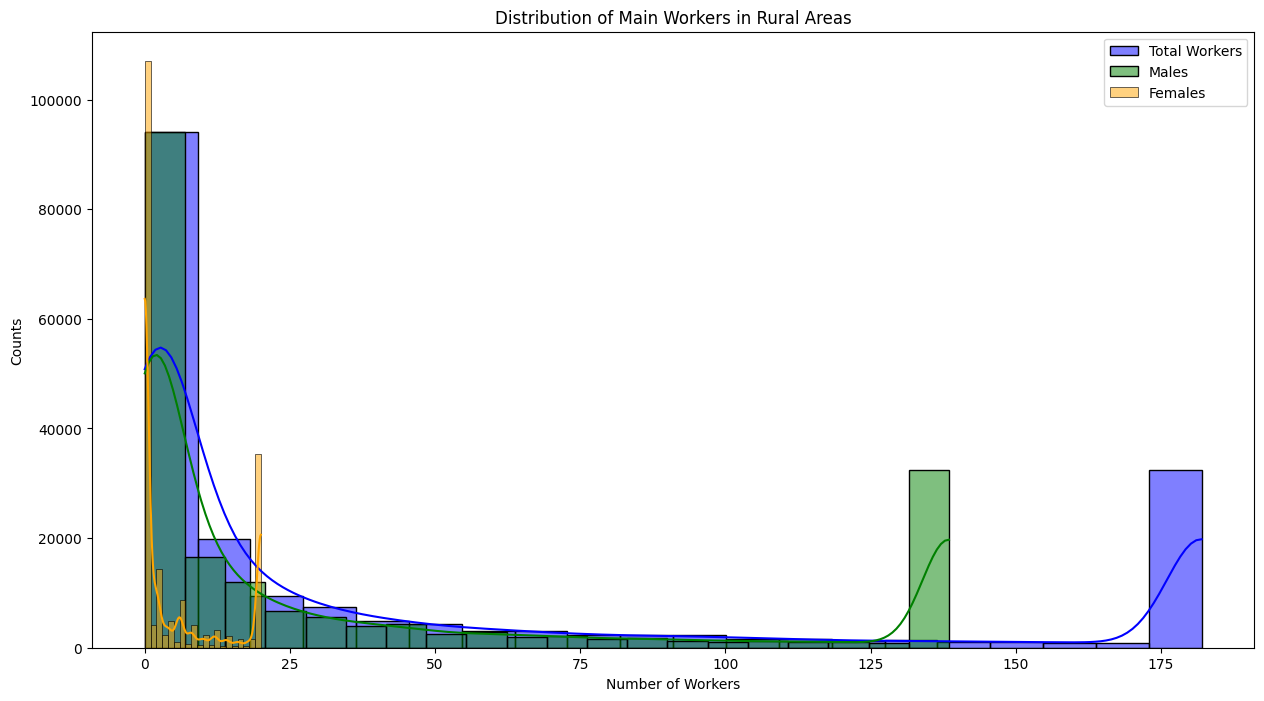

In [32]:
plt.figure(figsize=(15, 8))
sn.histplot(df_1['Main Workers Rural Persons'], bins=20, kde=True, color='blue', label='Total Workers')
sn.histplot(df_1['Main Workers Rural Males'], bins=20, kde=True, color='green', label='Males')
sn.histplot(df_1['Main Workers Rural Females'], bins=20, kde=True, color='orange', label='Females')
plt.legend()
plt.xlabel('Number of Workers')
plt.ylabel('Counts')
plt.title('Distribution of Main Workers in Rural Areas')
plt.show()

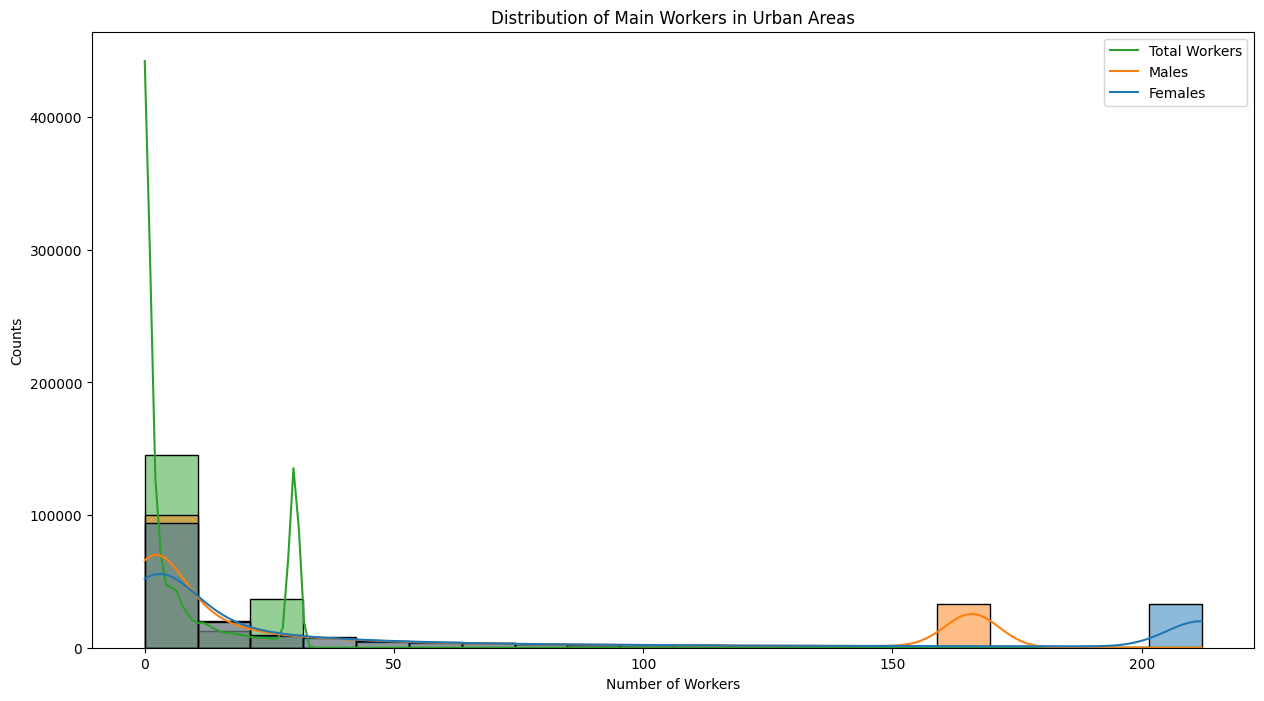

In [33]:
plt.figure(figsize=(15, 8))
sn.histplot(df_1[['Main Workers Urban Persons', 'Main Workers Urban Males', 'Main Workers Urban Females']], bins=20, kde=True)
plt.legend(['Total Workers', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Counts')
plt.title('Distribution of Main Workers in Urban Areas')
plt.show()

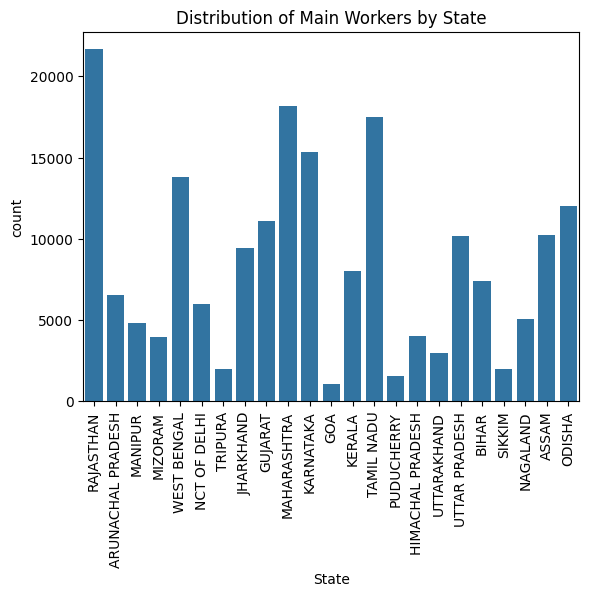

In [34]:
sn.countplot(x='State', data=df_1)
plt.xticks(rotation=90)
plt.title('Distribution of Main Workers by State')
plt.show()

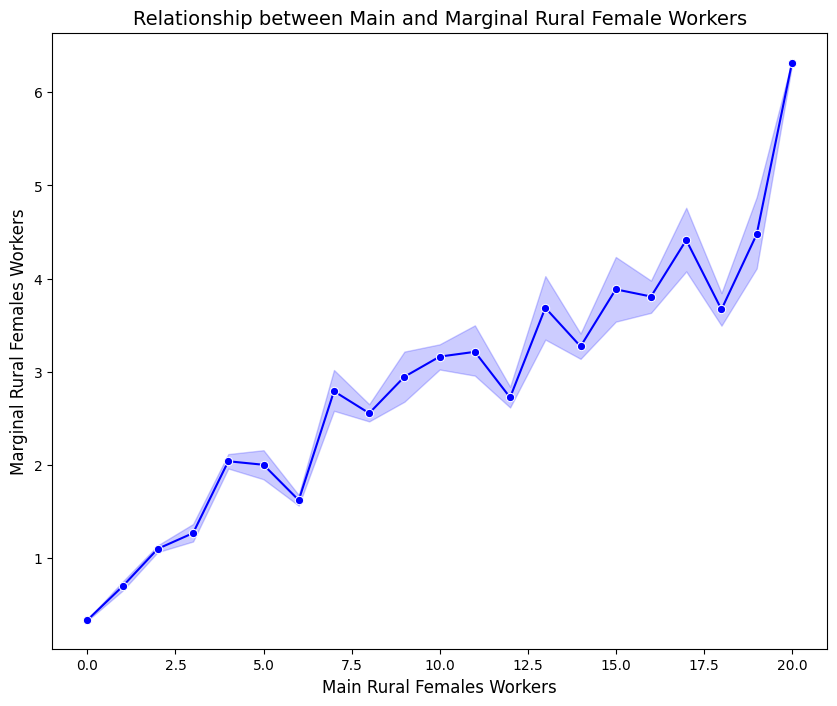

In [35]:
plt.figure(figsize=(10, 8))
sn.lineplot(x='Main Workers Rural Females', y='Marginal Workers Rural Females', data=df_1, color='blue', marker='o')
plt.xlabel('Main Rural Females Workers', fontsize=12)
plt.ylabel('Marginal Rural Females Workers', fontsize=12)
plt.title('Relationship between Main and Marginal Rural Female Workers', fontsize=14)
plt.show()

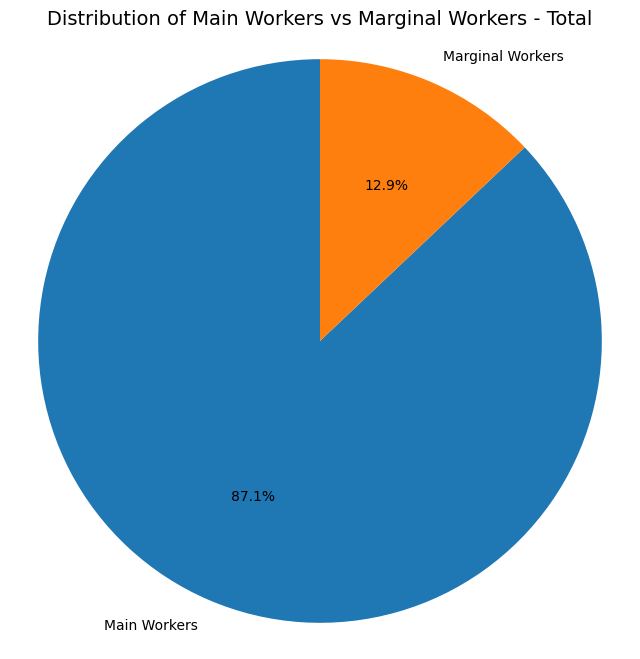

In [36]:
total_main_workers = df_1['Main Workers Total Persons'].sum()
total_marginal_workers = df_1['Marginal Workers Total Persons'].sum()
pie_data = [total_main_workers, total_marginal_workers]
labels = ['Main Workers', 'Marginal Workers']
plt.figure(figsize=(8, 8))
plt.pie(pie_data, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Main Workers vs Marginal Workers - Total', fontsize=14)
plt.axis('equal')
plt.show()

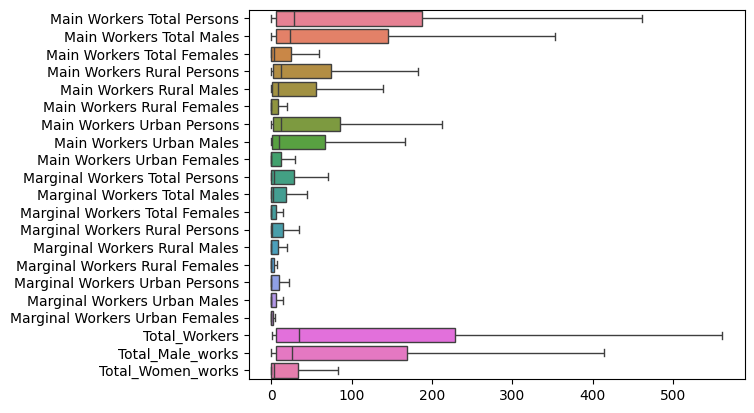

In [37]:
sn.boxplot(data=df_1, orient="h")
plt.show()

# NLP Model 

In [38]:
df_2 = df.copy()

In [42]:
#df_2['NIC Name'].unique()
df_2['NIC Name'].nunique()

587

In [ ]:
# !pip install nltk

In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Tokenize and clean text data
text = ' '.join(df_2['NIC Name'])
tokens = word_tokenize(text)
tokens = [word.lower() for word in tokens if word.isalpha()]
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Count word frequency
word_freq = Counter(tokens)
top_words = word_freq.most_common(10)

# Create a word cloud using the top words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

# Display the word cloud
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Top 10 NIC Names')
plt.axis('off')
plt.show()

KeyboardInterrupt: 

In [ ]:
import plotly.express as px

# Extract the top 10 most common words and their frequencies
top_words = [pair[0] for pair in word_freq.most_common(10)]
word_counts = [pair[1] for pair in word_freq.most_common(10)]

# Create a bar plot using Plotly
fig = px.bar(x=top_words, y=word_counts, labels={'x': 'Industry', 'y': 'Frequency'}, 
             title='Top 10 Industries by Frequency')
fig.show()

In [ ]:
df[['STATE', 'District']] = df['India/States'].str.split(' - ', expand=True)
def separate_state_district(row):
    parts = row.split(' - ')
    if parts[0].isupper():
        return parts[0]
    else:
        return None
df['State Name'] = df['District'].apply(separate_state_district)
state_names = df['State Name'].dropna().unique()
print(", ".join(state_names))